In [3]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


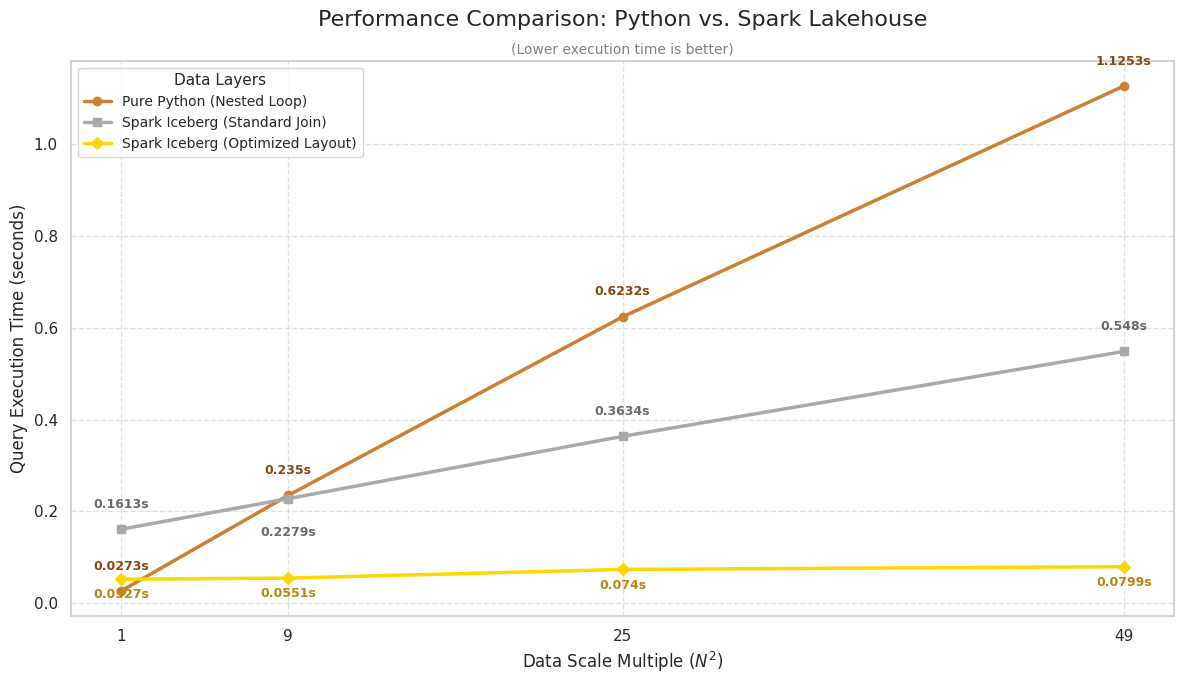

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 데이터셋 구성 (실험 수치 기반)
data = {
    'Multiple': [1, 9, 25, 49],
    'Baseline (Bronze)': [0.0273, 0.2350, 0.6232, 1.1253],
    'Iceberg-Silver': [0.1613, 0.2279, 0.3634, 0.5480],
    'Iceberg-Gold': [0.0527, 0.0551, 0.0740, 0.0799]
}

df = pd.DataFrame(data)

# 2. 그래프 스타일 설정
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))  # 여백 확보를 위해 크기 약간 키움

# 3. Medallion 색상 테마 적용
# Baseline: Bronze 색상 (#CD7F32)
plt.plot(df['Multiple'], df['Baseline (Bronze)'], marker='o', linewidth=2.5,
         label='Pure Python (Nested Loop)', color='#CD7F32')

# Iceberg-Silver: Silver 색상 (#C0C0C0 -> 가독성 위해 #A9A9A9)
plt.plot(df['Multiple'], df['Iceberg-Silver'], marker='s', linewidth=2.5,
         label='Spark Iceberg (Standard Join)', color='#A9A9A9') 

# Iceberg-Gold: Gold 색상 (#FFD700)
plt.plot(df['Multiple'], df['Iceberg-Gold'], marker='D', linewidth=2.5,
         label='Spark Iceberg (Optimized Layout)', color='#FFD700')

# 4. 그래프 디테일 설정
plt.title('Performance Comparison: Python vs. Spark Lakehouse', fontsize=16, pad=25)

# 부제
plt.text(0.5, 1.02, '(Lower execution time is better)', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=10, color='gray')

plt.xlabel('Data Scale Multiple ($N^2$)', fontsize=12)
plt.ylabel('Query Execution Time (seconds)', fontsize=12)
plt.xticks(df['Multiple'])

# 5. 범례 및 그리드
plt.legend(title="Data Layers", title_fontsize='11', fontsize='10', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# 6. 수치 라벨링 (모든 레이어 적용)

# (1) Baseline (Bronze) - 위쪽에 표시
for i, val in enumerate(df['Baseline (Bronze)']):
    plt.text(df['Multiple'][i], val + 0.04, f'{val}s', 
             ha='center', va='bottom', color='#8B4513', fontsize=9, fontweight='bold')

# (2) Iceberg-Silver - 위쪽에 표시 (Bronze와 겹칠 경우 살짝 조정 필요할 수 있으나, 현재 데이터상 괜찮음)
for i, val in enumerate(df['Iceberg-Silver']):
    # x=9 구간에서 Bronze와 값이 비슷하여 겹칠 수 있으므로, 약간의 오프셋 조정 (조건부)
    offset = 0.04 if i != 1 else -0.06  # 두 번째 점(x=9)만 아래로 내려서 겹침 방지
    va_align = 'bottom' if i != 1 else 'top'
    
    plt.text(df['Multiple'][i], val + offset, f'{val}s', 
             ha='center', va=va_align, color='#696969', fontsize=9, fontweight='bold')

# (3) Iceberg-Gold - 아래쪽에 표시 (그래프 최하단이므로 아래가 깔끔함)
for i, val in enumerate(df['Iceberg-Gold']):
    plt.text(df['Multiple'][i], val - 0.02, f'{val}s', 
             ha='center', va='top', color='#B8860B', fontsize=9, fontweight='bold') 
             # #B8860B: Dark Golden Rod (노란색 글씨는 안보여서 어두운 금색 사용)

plt.tight_layout()
plt.show()